## Regression

In [25]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model, model_selection

In [26]:
X, y = datasets.load_diabetes(return_X_y=True)

print(X.shape)
print(X[0])

(442, 10)
[ 0.03807591  0.05068012  0.06169621  0.02187239 -0.0442235  -0.03482076
 -0.04340085 -0.00259226  0.01990749 -0.01764613]


In [27]:
X = X[:, 2] ## on garde que la 3eme valeur soit le bmi (body mass indicator)
X = X.reshape((-1,1)) ## on a un tableau 1D on va le reshape pour avec avoir du 2D
print(X)

[[ 0.06169621]
 [-0.05147406]
 [ 0.04445121]
 [-0.01159501]
 [-0.03638469]
 [-0.04069594]
 [-0.04716281]
 [-0.00189471]
 [ 0.06169621]
 [ 0.03906215]
 [-0.08380842]
 [ 0.01750591]
 [-0.02884001]
 [-0.00189471]
 [-0.02560657]
 [-0.01806189]
 [ 0.04229559]
 [ 0.01211685]
 [-0.0105172 ]
 [-0.01806189]
 [-0.05686312]
 [-0.02237314]
 [-0.00405033]
 [ 0.06061839]
 [ 0.03582872]
 [-0.01267283]
 [-0.07734155]
 [ 0.05954058]
 [-0.02129532]
 [-0.00620595]
 [ 0.04445121]
 [-0.06548562]
 [ 0.12528712]
 [-0.05039625]
 [-0.06332999]
 [-0.03099563]
 [ 0.02289497]
 [ 0.01103904]
 [ 0.07139652]
 [ 0.01427248]
 [-0.00836158]
 [-0.06764124]
 [-0.0105172 ]
 [-0.02345095]
 [ 0.06816308]
 [-0.03530688]
 [-0.01159501]
 [-0.0730303 ]
 [-0.04177375]
 [ 0.01427248]
 [-0.00728377]
 [ 0.0164281 ]
 [-0.00943939]
 [-0.01590626]
 [ 0.0250506 ]
 [-0.04931844]
 [ 0.04121778]
 [-0.06332999]
 [-0.06440781]
 [-0.02560657]
 [-0.00405033]
 [ 0.00457217]
 [-0.00728377]
 [-0.0374625 ]
 [-0.02560657]
 [-0.02452876]
 [-0.01806

In [28]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.33)
model = linear_model.LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [29]:
y_pred = model.predict(X_test)

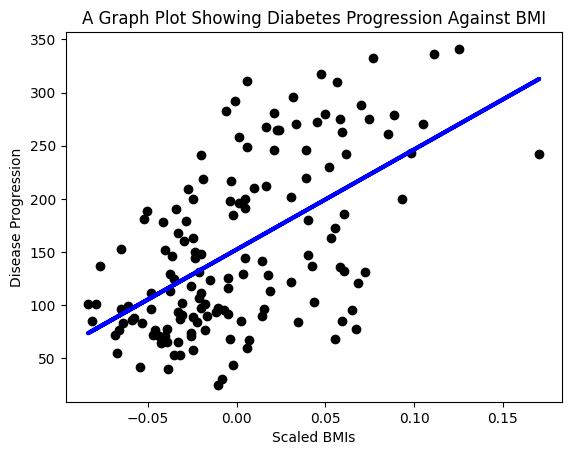

In [30]:
plt.scatter(X_test, y_test,  color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=3)
plt.xlabel('Scaled BMIs')
plt.ylabel('Disease Progression')
plt.title('A Graph Plot Showing Diabetes Progression Against BMI')
plt.show()

### Trouver le meilleur moment pour acheter une citrouille

Il y'a des soucis dans le dataset US-pumpkins des données sont manquantes on va donc devoir corriger ça

In [31]:
import pandas as pd

In [32]:
data = pd.read_csv("./data/US-pumpkins.csv")
print(data.shape)
data.head(5)


(1757, 26)


,City Name,Type,Package,Variety,Sub Variety,Grade,Date,Low Price,High Price,Mostly Low,...,Unit of Sale,Quality,Condition,Appearance,Storage,Crop,Repack,Trans Mode,Unnamed: 24,Unnamed: 25
0,BALTIMORE,NaN,24 inch bins,NaN,NaN,NaN,4/29/17,270.0,280.0,270.0,...,NaN,NaN,NaN,NaN,NaN,NaN,E,NaN,NaN,NaN
1,BALTIMORE,NaN,24 inch bins,NaN,NaN,NaN,5/6/17,270.0,280.0,270.0,...,NaN,NaN,NaN,NaN,NaN,NaN,E,NaN,NaN,NaN
2,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,9/24/16,160.0,160.0,160.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
3,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,9/24/16,160.0,160.0,160.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
4,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,11/5/16,90.0,100.0,90.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN


In [33]:
data.isnull().sum() ## vérification des valeurs qui manquent

City Name             0
Type               1712
Package               0
Variety               5
Sub Variety        1461
Grade              1757
Date                  0
Low Price             0
High Price            0
Mostly Low          103
Mostly High         103
Origin                3
Origin District    1626
Item Size           279
Color               616
Environment        1757
Unit of Sale       1595
Quality            1757
Condition          1757
Appearance         1757
Storage            1757
Crop               1757
Repack                0
Trans Mode         1757
Unnamed: 24        1757
Unnamed: 25        1654
dtype: int64

In [ ]:
columns_to_select = ['Package', 'Low Price', 'High Price', 'Date']
pumpkins = data.loc[:, columns_to_select]

price = (pumpkins['Low Price'] + pumpkins['High Price']) / 2
month = pd.DatetimeIndex(pumpkins['Date']).month

In [35]:
new_pumpkins = pd.DataFrame({'Month': month, 'Package': pumpkins['Package'], 'Low Price': pumpkins['Low Price'],'High Price': pumpkins['High Price'], 'Price': price})
pumpkins = pumpkins[pumpkins['Package'].str.contains('bushel', case=True, regex=True)]
new_pumpkins.loc[new_pumpkins['Package'].str.contains('1 1/9'), 'Price'] = price/(1 + 1/9)
new_pumpkins.loc[new_pumpkins['Package'].str.contains('1/2'), 'Price'] = price/(1/2)
new_pumpkins.tail()

,Month,Package,Low Price,High Price,Price
1752,9,22 lb cartons,14.75,14.75,14.75
1753,9,36 inch bins,275.00,275.00,275.00
1754,9,36 inch bins,275.00,275.00,275.00
1755,9,36 inch bins,275.00,275.00,275.00
1756,9,36 inch bins,275.00,275.00,275.00


Text(0, 0.5, 'Pumpkin Price')

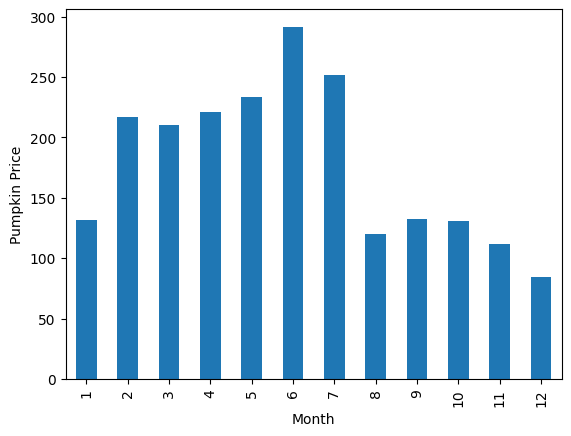

In [36]:
new_pumpkins.groupby(['Month'])['Price'].mean().plot(kind='bar')
plt.ylabel("Pumpkin Price")

## Linear Regression